<h1> Lab 7 - Diffraction Gratings</h1>

**EE/PHY 450/550**

**Scott Prahl**

**10 May 2019, Version 4**

In [1]:
# Execute these lines before starting the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#routine to return an angle formatted like 50° 28'
def degreestring(x):
    degree = np.floor(x+1e-6)
    minutes = round((x-degree)*60)
    return "%.0f° %.0f'" % (degree,minutes)

# Background

## Handling Gratings

A diffraction grating is a first surface optic, so its surface cannot be touched or otherwise come in contact with another object without damaging it and perhaps affecting its performance. Damage can take the form of contamination (as in the adherence of finger oils) or distortion of the microscopic groove profile in the region of contact.

* Never touch the grooved surface of a diffraction grating. Handle a grating by holding it by its edges. If possible, use powder free gloves while handling gratings.

* Never allow any mount or cover to come in contact with the grooved surface of a diffraction grating. A grating that will be shipped should have its surface protected with a specially-designed cover that does not touch the surface itself. Gratings that are not in use should be kept in a closed box when not covered. 

* Do not talk or breathe over the grooved surface of a diffraction grating. Wear a nose and face mask when it is required that you talk over the surface of a grating. Breath spray is particularly bad for reflection gratings, so one should not speak directly over the surface; instead, either turn away or cover the mouth (with the hand or a surgical mask).

## Reflection Gratings

A reflection grating is an object with a series of periodic, parallel lines and has the interesting feature of reflecting light, not only at an angle of equal to the angle of incidence (as a mirror does), but also at other angles $\beta_m$.  The figure below is a cross-section of a blazed diffraction grating with periodic V-shaped grooves. 

<img src="http://omlc.org/~prahl/host/450/week7/grating.png" width="40%">

The utility of the grating arises because the angles $\beta_m$ depend on wavelength; different wavelengths are diffracted at different angles and therefore will be separated from each other.  The angles $\beta_m$ are specified by the grating equation
$$
m\lambda = d (\sin\beta_m + \sin\alpha)
$$
where $d$ is the spacing between successive lines, $\alpha$ is the angle of incidence, $\lambda$ is the wavelength of light, and $m$ is an integer that specifies the particular *order* of the diffracted light. 

The angles are measured from the normal and the sign is specified as in the figure above.  For example, in this figure, both $\alpha$ and $\beta_1$ are positive but $\beta_{-1}$ is negative. 

The special case when $m=0$ corresponds to specular reflection.  The specular reflection angle is equal and opposite to the incident angle $\beta_0=-\alpha$.  

This zero-order angle $\beta_0$ is independent of wavelength and therefore does not separate or disperse different wavelengths.  Any light that ends up in the zero-order is lost and reduces the efficiency of the grating.

A specific example for light incident at 23° on a 600 line/mm grating is shown below.

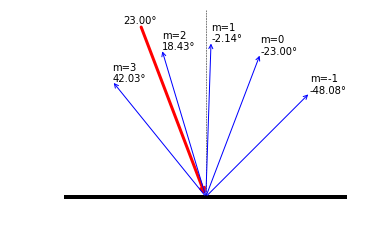

In [3]:
lambda0 = 589e-9 # in m
alpha = 23       # degrees
lpmm = 600       # lines per mm

aplt = reflection_grating_figure(lambda0, lpmm, np.radians(alpha))
aplt.show()

## Diffraction Efficiency and Littrow Condition

The amount of light diffracted into each order determines the efficiency of that order.  The graph below shows the efficiency of the grating as a function of wavelength.

<img src="https://www.thorlabs.com/images/tabImages/500_1800_Ruled_Grating_Efficiency_Graph_780.gif"  width="40%">

These graphs are measured in an angle of incidence which maximizes the efficiency of the grating.  This turns out to be  when the diffracted light is retroreflected directly back. This is the called the **Littrow Condition**.
$$
\alpha = \beta
$$
This is shown in the figure below in which the incident light (blue) is diffracted back into the direction that it came from.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Blazed_grating.svg/797px-Blazed_grating.svg.png" width="30%">


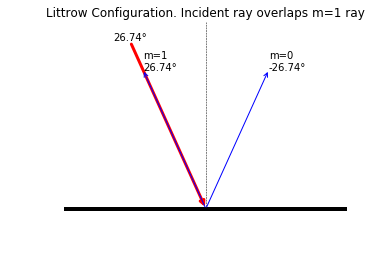

In [4]:
# Littrow Condition for the reflection grating
lpmm = 1800      # grooves per mm
lambda0 = 500e-9 # in m
d = 1e-3/lpmm    # in m 

# Littrow condition
alpha = np.arcsin(lambda0/2/d)
aplt = reflection_grating_figure(lambda0, lpmm, alpha)
aplt.title("Littrow Configuration. Incident ray overlaps m=1 ray")
aplt.show()

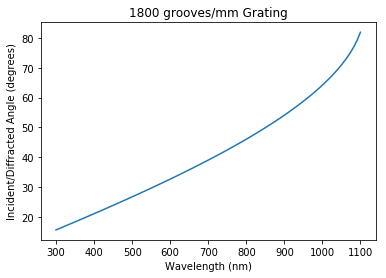

In [13]:
# Littrow condition as a function of wavelength
lpmm = 1800      # grooves per mm
lambda0 = np.linspace(300,1100,100)*1e-9
d = 1e-3/lpmm    # in m 

# Littrow condition
alpha = np.arcsin(lambda0/2/d)
plt.plot(lambda0*1e9, np.degrees(alpha))
plt.title("%d grooves/mm Grating" % lpmm)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Incident/Diffracted Angle (degrees)")
plt.show()

## Blaze angle

The angle of the facets on the grating is called the  **blaze angle** $\theta_B$ of the facets.  In the figure below FN refers to the facet normal and GN is the grating normal.

<img src="https://omlc.org/~prahl/host/450/week7/blaze.png" width="30%">

**The blaze angle $\theta_B$ does not affect the angles of diffraction $\beta_m$**.  The blaze angle only *affects the efficiency* of the grating.  Our intuition is useless because the facet size is comparable to the wavelength of light and the ray optics don't apply.  

However, in the Littrow configuration, the facets behave like tiny mirrors to concentrate more light into the reflected order.  In this case, $\alpha=\beta=\theta_B$ and the grating equation becomes
$$ 
\sin\theta_B = \frac{m\lambda_B}{2d}
$$
where $\lambda_B$ is called the blaze wavelength.

>The efficiency of the Littrow arrangement allows the grating to be used as an end mirror of a laser resonator. Small changes in $\alpha$ mean that the wavelength returned in the Littrow condition will change.  Thus the grating orientation only the laser wavelength returned to the cavity for amplification. This allows one to create wavelength-tunable lasers.

In practice, the direction of the blaze angle is indicated by an arrow on one edge of the grating.  

<img src="https://omlc.org/~prahl/host/450/week7/lab7-fig-05.jpg" width="30%">

The blaze arrow can be thought of in two (equivalent) ways.  First, the arrow points from the grating normal to the bisector between the incident and diffracted beams:
<img src="http://www.gratinglab.com/Information/Technical_Notes/TechImages/tn7_3.gif" width="30%">
Or secondly, the arrow points from the peak of the (asymmetric) groove to the trough of the groove.
<img src="http://www.gratinglab.com/Information/Technical_Notes/TechImages/tn7_4.gif" width="30%">


In [19]:
# Calculate the Blaze angle for our reflection grating
lpmm = 1800         # grooves per mm
lambdaB = 500e-9    # in m

d = 1e-3/lpmm     # in m 
angle=np.arcsin(lambdaB/d/2)
print("Calculated blaze angle is %.2f°" % np.degrees(angle))
print("Expected   blaze angle is %.2f°" % (26+44/60))

Calculated blaze angle is 26.74°
Expected   blaze angle is 26.73°


In [27]:
# Calculate the separation between Sodium lines with reflection grating
lpmm = 1800        # lines per mm
lambda1 = 589.0e-9 # in m
lambda2 = 589.6e-9 # in m

alpha  = 10     # in radians

d = 1e-3/lpmm     # in m 

beta1=np.arcsin(lambda1/d-np.sin(np.radians(alpha)))
beta2=np.arcsin(lambda2/d-np.sin(np.radians(alpha)))

deltabeta = np.degrees(beta2-beta1)
s= degreestring(deltabeta)
print("The angle between the sodium lines when incidence angle = %d° is %s" % (alpha, s))

The angle between the sodium lines when incidence angle = 10° is 0° 8'


## DVDs and CDs

Scanning Electron Microscope Images.  Original was at http://volga.eng.yale.edu/index.php/CDsAndDVDs/MethodsAndMaterials

<table>
<tr>
    <td><img src="https://omlc.org/~prahl/host/450/week7/CD-SEM.jpg" width="100%"></td>
    <td><img src="https://omlc.org/~prahl/host/450/week7/DVD-SEM.jpg" width="100%"></td>
</tr>
<tr>
    <td>CD</td>
    <td>DVD</td>
</tr>

</table>

A commonly encountered surface that disperses light upon reflection is a CD and DVD surface.  The lines on the CD and DVD are apparent under scanning electron microscopy (SEM above).  

In this lab you'll prepare your own transmission grating using a blank CD.

To remove the foil on the CD, scratch the surface and then use tape to remove the remaining reflective foil. 

<table>
<tr>
    <td><img src="https://omlc.org/~prahl/host/450/week7/lab7-fig-06.jpg" width="100%"></td>
    <td><img src="https://omlc.org/~prahl/host/450/week7/lab7-fig-08.jpg" width="100%"></td>
</tr>
<tr>
    <td>Scratch CD</td>
    <td>Use tape to remove reflective foil</td>
</tr>

</table>

For the DVD, you would need to separate the two layers with a razor blade and then remove the foil as with the CD to create a transmission grating.

## Student Spectrometer

The student spectrometer consists of a collimator and a telescope.  A vernier scale allows the angle (between the optical axis of the collimator and the optical axis of the telescope) to be measured precisely ($\pm30$ arc seconds or $\pm$0.5 arc minutes or about $\pm$0.008 degrees).

<img src="http://omlc.org/~prahl/host/450/week7/IMG-2217.jpg" width="50%">

The collimator has two adjustments: the width of the entrance slit and the position of the its lens.  If the lens is focused so the slit is in the focal plane of the lens, consequently,  the collimator produces a collimated beam of light.  The collimation of this beam depends on the width of the slit.  A small slit produces better collimated light (**why**), but the collimated beam is correspondingly weaker.

<img src="http://omlc.org/~prahl/host/450/week7/student-spectrometer.png" width="50%">

A viewing telescope allows you to exactly locate the angle of reflected or diffracted light.  The telescope is designed so that it produces an image of the slit in the plane of the cross-hairs.  A Ramsden eyepiece conveniently magnifies the cross-hairs and slit image to facilitate measurements.

## Pre-lab Questions

### Problem 1
What is the line spacing of the CD and DVD based on the images above?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 2
Sodium light is incident at 0 and 25 degrees on the CD grating.  Draw and label all transmitted orders.

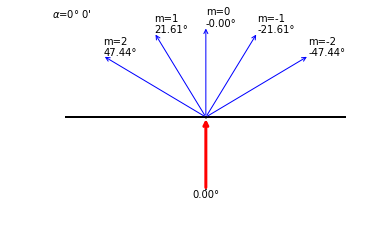

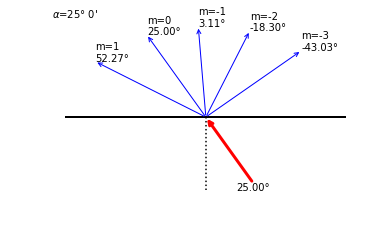

In [37]:
lambda0 = 589.3e-9 # meters
d = 1600e-9        # meters
alpha = 0          # degrees

# YOUR CODE HERE
raise NotImplementedError()

### Problem 3
Sodium light is incident on the 1800 line/mm reflection grating at 40° from the normal.  Draw and label all reflected orders.

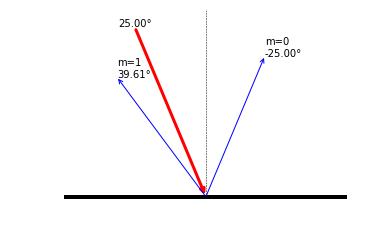

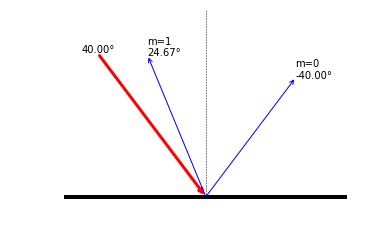

In [39]:
lambda0 = 589e-9 # m
lpmm = 1800      # 1/mm
alpha = 40        # degrees

# YOUR CODE HERE
raise NotImplementedError()

### Problem 5

To be successful in this lab, it is important that you read the scale correctly, and it is really easy to misread the scale above.  Note that the top vernier scale has 60 divisions and not 30 as you might expect.  Take your time and verify with other students.

<img src="http://omlc.org/~prahl/host/450/week7/IMG-2234.jpg" width="100%">

What is the angle (in degrees and arc minutes) on the vernier scale above?  

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 6
What is the angle above in decimal degrees?**

In [10]:
# YOUR CODE HERE
raise NotImplementedError()

The angle is 184.333°


### Problem 7

How will you set 0° on the spectrometer scale? the transmission experiment it is pretty easy to establish the angle for the transmitted light.  Explain how to do this.

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 8
When a reflection grating is used, how will you determine the angle of incidence $\alpha$ when the prism table is in an arbitrary orientation? *Hint, use the fact that the specular reflection angle is twice $\alpha$.*

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 9 (550 students)
Why is the eyepiece on the spectrometer a Ramsden eyepiece?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

## Experiment

### Make a CD transmission grating.

You'll use the student spectrometers to measure diffraction angles.  Put the plastic feet on under the two smaller spectrometer feet.  

<img src="https://omlc.org/~prahl/host/450/week7/lab7-fig-01.jpg" width="100%">

Put the bubble level on the prism plate.  It should remain level as it is rotated.  This will require you to adjust the leveling feet and the base of the prism plate.

### Light source
You'll use the low pressure sodium lamp as a light source.  It should be 100mm from entrance slit.  You will need to block unwanted light for all measurements. 

### Basic Alignment
Look through the telescope and focus on the cross-hairs (by sliding the eyepiece assembly in and out).

Align the telescope cross-hairs with the slit image. Adjust the slit to the smallest practical width.  The two spectrometer arms should be about equal in length.

<img src="https://omlc.org/~prahl/host/450/week7/lab7-fig-03.jpg" width="20%">

### Figure out how the spectrometer rings move
There are three places to prevent rotation of the sample.  Identify all three.  Figure out how to set the prism table so when the sample is perpendicular to the beam, the spectrometer reads 0°.  

### Measure the angles of the transmitted orders of the CD for light incident at 0° and 25°.  

Repeat the measurements three times.  These are faint and you will not find them by randomly looking.  Align things carefully and move the telescope to the angle that you expect to see the diffracted beams.  You are likely to see only the first order fringes.

At 24.5, 25, and 25° incidence, measure the separation of the two sodium lines.

### Repeat for the reflectance grating

Measure the angles of the reflected light from the commercial grating for light incident at 25° and 40°.  Repeat the measurements three times.  

At 39.5, 40, and 40.5° incidence, measure the separation of the two sodium lines.

### Measure the extinction efficiency (550 students)

Use the tungsten lamp and a monochromator to measure relative diffraction efficiency.  Work as close to a Littrow condition as possible.

# Analysis

The commercial gratings have 1800 groves/mm with a blaze angle of $\gamma=26°44'$ (that maximizes the grating efficiency at 500nm).

The nominal separation between tracks is 1600nm for a CD.

Compare your grating sizes with those calculated from your measurements.